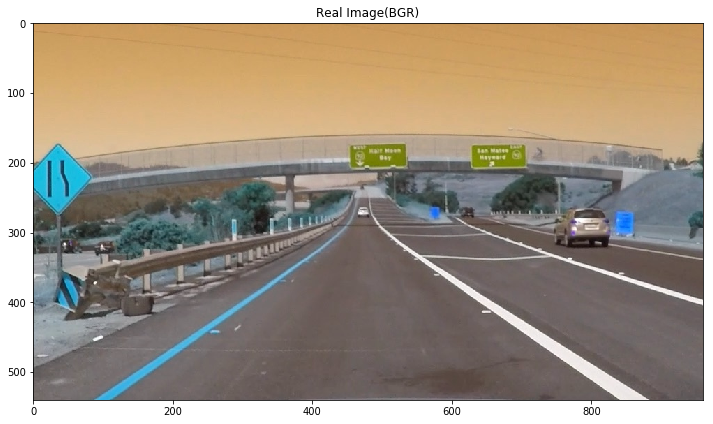

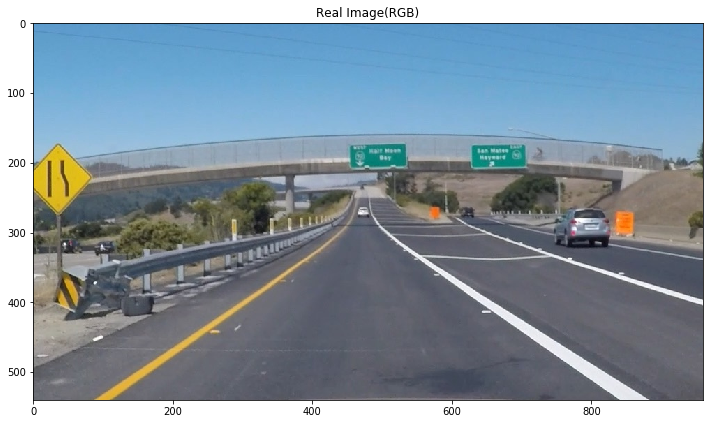

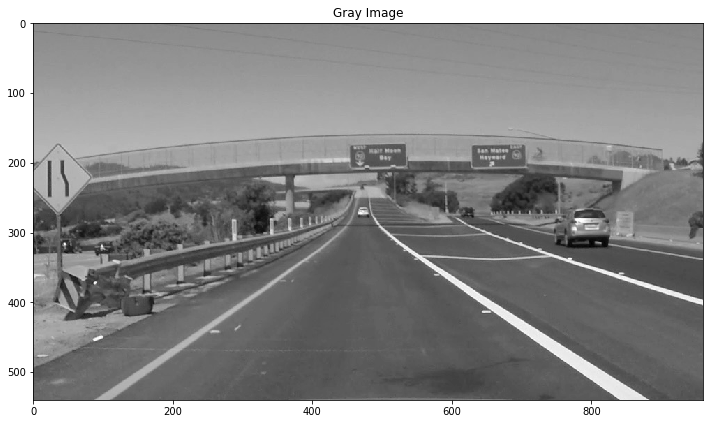

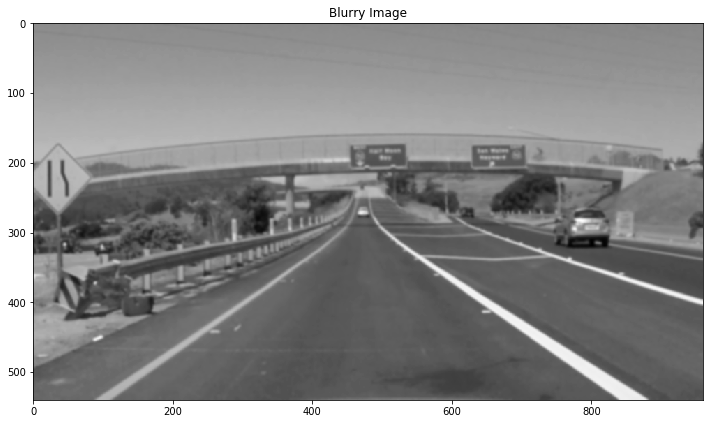

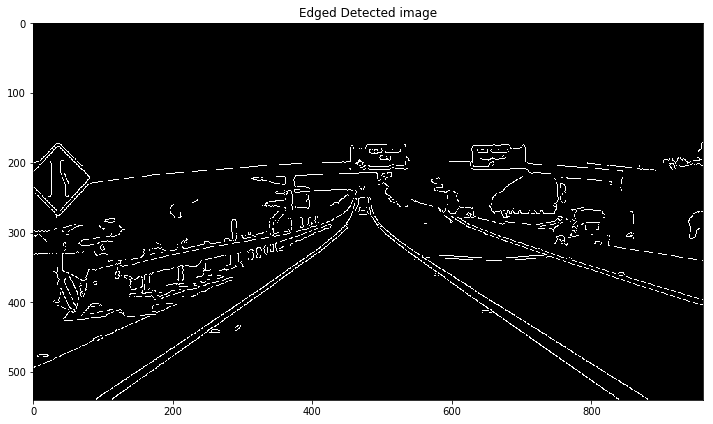

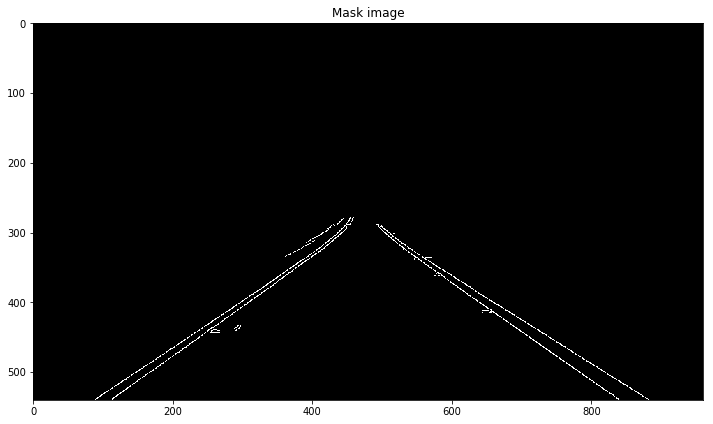

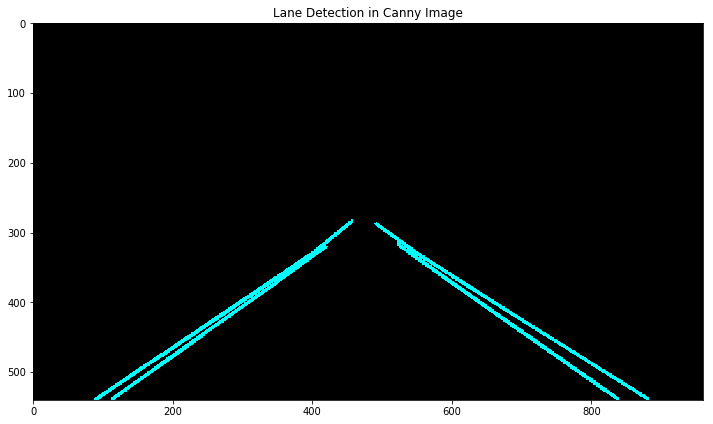

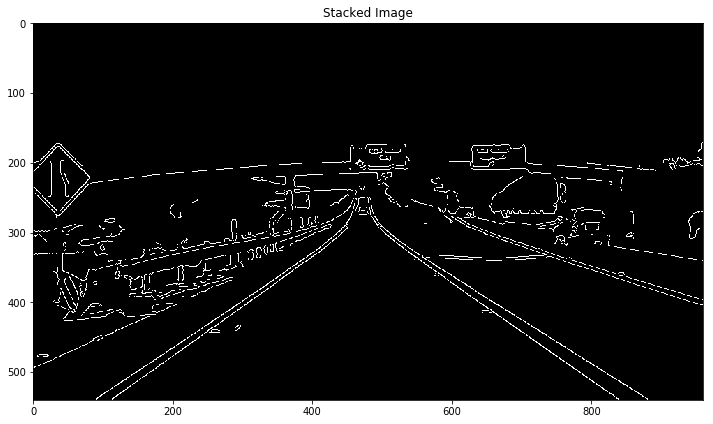

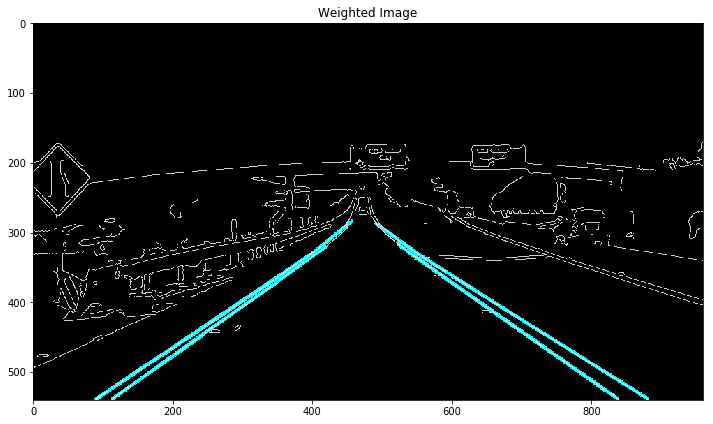

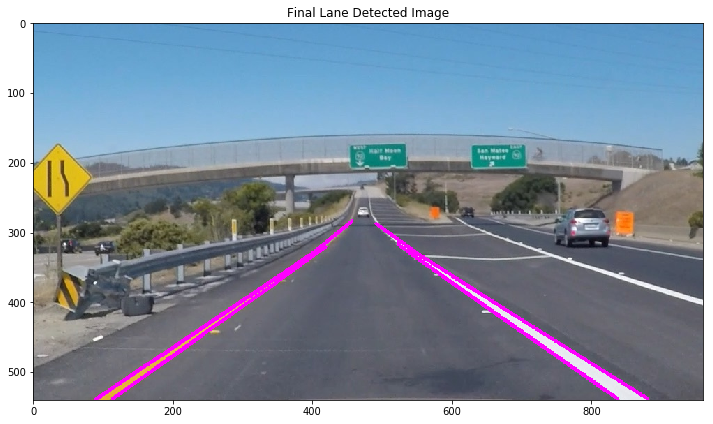

In [232]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

def display(img, title):
    fig = plt.figure(figsize = (12, 10))
    ax = fig.add_subplot(111)
    plt.title(title)
    ax.imshow(img, cmap = 'gray')

    
# Read in and grayscale the image
image = cv2.imread('exit-ramp.jpg')
display(image, 'Real Image(BGR)')

image_prime = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
display(image_prime, 'Real Image(RGB)')

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display(gray_img, 'Gray Image')


# Define a kernel size and apply Gaussian smoothing
kernel_size = 7
blurr_img = cv2.GaussianBlur(gray_img, (kernel_size, kernel_size), 0)
display(blurr_img, 'Blurry Image')


# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150

edge_img = cv2.Canny(blurr_img, low_threshold, high_threshold)
display(edge_img, 'Edged Detected image')

#Taking the copy of canny image
edge_copy = edge_img.copy()


# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edge_img)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(50,imshape[0]),(450, 275), (500, 290), (900,imshape[0])]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)

masked_edges = cv2.bitwise_and(edges, mask)
display(masked_edges, 'Mask image')


# Define the Hough transform parameters
# Make a blank the same size as our image to draw on

rho = 1 # distance resolution in pixels of the Hough grid

theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 50    # minimum number of votes (intersections in Hough grid cell)

min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments

#creating a blank to draw lines on
zero_img = img.copy()*0 

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(zero_img, (x1,y1), (x2,y2), (0 , 255, 255), 4)
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 255), 4)

display(zero_img, 'Lane Detection in Canny Image')


# Create a "color" binary image to combine with line image
color_edges = np.dstack((edge_copy, edge_copy, edge_copy)) 
display(color_edges, 'Stacked Image')


# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, zero_img, 1, 0) 
display(combo, 'Weighted Image')

#Drawing the Final Image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(image, 'Final Lane Detected Image')